In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('silver.csv',parse_dates=['Date'],index_col='Date')
data.head()

,USD,GBP,EURO
Date,,,
2022-04-21,24.645,18.87,22.61
2022-04-20,25.200,19.30,23.21
2022-04-19,25.915,19.89,24.01
2022-04-14,25.655,19.54,23.53
2022-04-13,25.640,19.72,23.68


In [3]:

data['USD'].fillna(method='ffill', inplace=True)

data = data.dropna(subset=['USD'])  
data = data[np.isfinite(data['USD'])] 


In [4]:
result = adfuller(data['USD']) 
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -2.9699058544640433
p-value: 0.03780199999910184


In [5]:
x=int(0.8 * len(data))
train_data = data.iloc[:x]
test_data = data.iloc[x:]

In [6]:
lag_order = 13
model = AutoReg(train_data['USD'], lags=lag_order)
model_fit = model.fit()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<Figure size 1000x600 with 0 Axes>

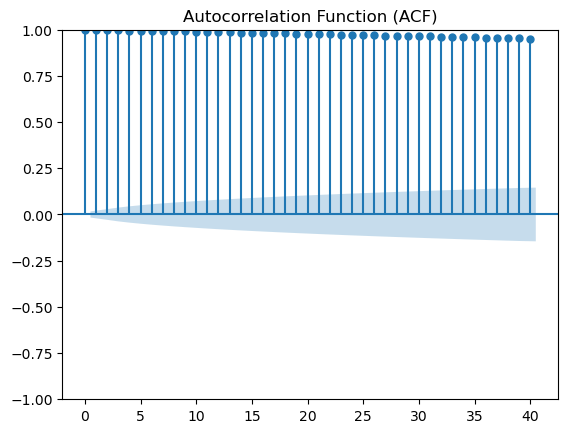

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 1000x600 with 0 Axes>

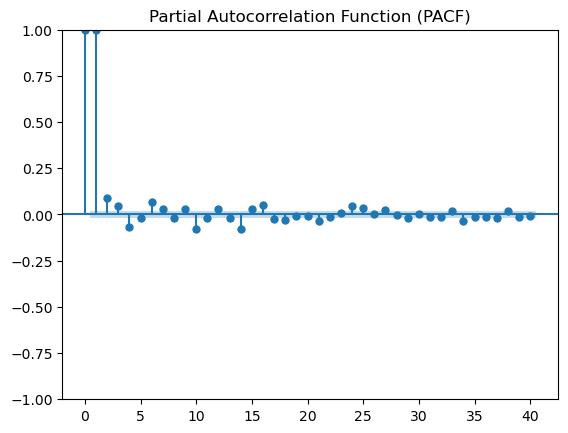

In [7]:
plt.figure(figsize=(10, 6))
plot_acf(data['USD'], lags=40, alpha=0.05)
plt.title('Autocorrelation Function (ACF)')
plt.show()
plt.figure(figsize=(10, 6))
plot_pacf(data['USD'], lags=40, alpha=0.05)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

In [8]:
predictions = model_fit.predict(start=len(train_data), end=len(train_data)+len(test_data)-1)

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [9]:
mse = mean_squared_error(test_data['USD'], predictions)
print('Mean Squared Error (MSE):', mse)

Mean Squared Error (MSE): 41.43445873377197


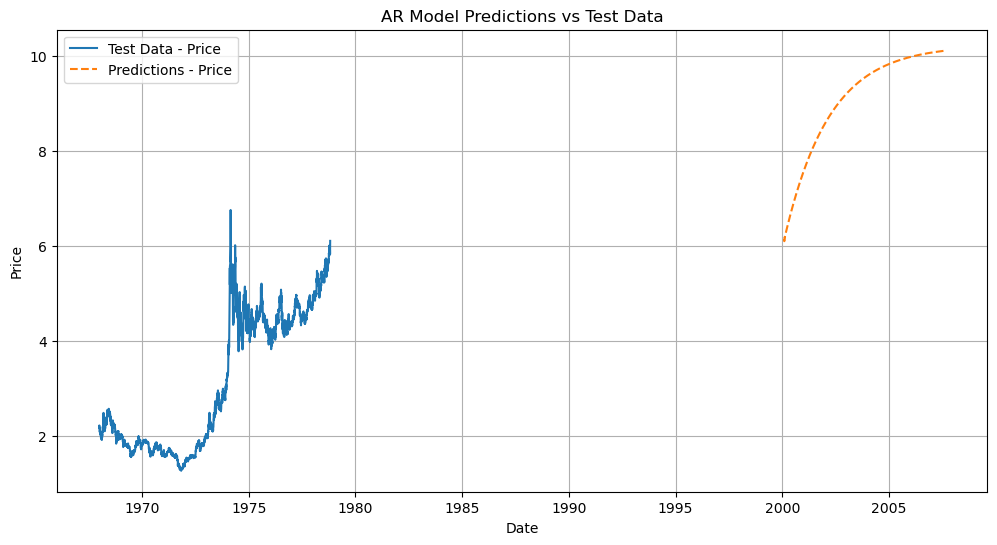

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(test_data['USD'], label='Test Data - Price')
plt.plot(predictions, label='Predictions - Price',linestyle='--')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('AR Model Predictions vs Test Data')
plt.legend()
plt.grid()
plt.show()